In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

In [28]:
df = pd.read_csv('placement.csv')
df

cgpa  package
0    6.89     3.26
1    5.12     1.98
2    7.82     3.25
3    7.42     3.67
4    6.94     3.57
..    ...      ...
195  6.93     2.46
196  5.89     2.57
197  7.21     3.24
198  7.63     3.96
199  6.22     2.33

[200 rows x 2 columns]

Text(0, 0.5, 'Package(in lpa)')

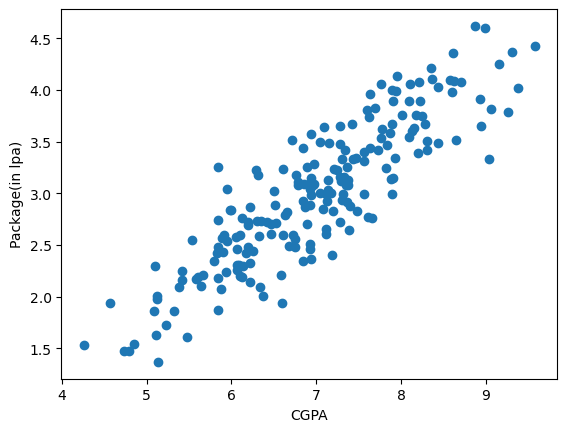

In [29]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [30]:
X = df.iloc[:, 0:1]
y = df.iloc[:, -1]

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((160, 1), (160,), (40, 1), (40,))

![A descriptive alt text](simple_linear_regression.png)


In [32]:
class SimpleLinRegression:
    def __init__(self):
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        numerator = 0
        denominator = 0
        
        for i in range(X_train.shape[0]):
            # {(xi -x') * {(yi - y')
            numerator += (X_train[i] - X_train.mean()) * (y_train[i] - y_train.mean())

            # {{(xi -x')^2
            denominator += (X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean())
            
            self.m = numerator / denominator
            self.b = y_train.mean() - (self.m * X_train.mean())
            print(self.m,self.b)
            
    def predict(self,X_test):
        return self.b + (self.m * X_test)
            

In [33]:
lr = SimpleLinRegression()

In [34]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [35]:
lr.fit(X_train,y_train)

[0.84006664] [-2.8680758]
[0.46924607] [-0.27606319]
[0.47357848] [-0.3063465]
[0.43681145] [-0.04934724]
[0.49030328] [-0.42325179]
[0.4839694] [-0.37897834]
[0.48640321] [-0.39599052]
[0.49703213] [-0.47028605]
[0.47199392] [-0.29527053]
[0.43974818] [-0.06987478]
[0.47590917] [-0.32263787]
[0.51633972] [-0.6052449]
[0.52119086] [-0.63915405]
[0.5291616] [-0.69486903]
[0.53052812] [-0.70442091]
[0.52992237] [-0.70018678]
[0.56393834] [-0.93795626]
[0.57167524] [-0.99203668]
[0.57294557] [-1.00091624]
[0.57402428] [-1.00845632]
[0.58145189] [-1.06037485]
[0.5765852] [-1.026357]
[0.57265117] [-0.99885839]
[0.56740905] [-0.96221631]
[0.5710666] [-0.98778236]
[0.57227836] [-0.99625248]
[0.562582] [-0.92847553]
[0.57069231] [-0.98516609]
[0.57278178] [-0.99977136]
[0.5854696] [-1.08845843]
[0.58185579] [-1.06319811]
[0.58331111] [-1.07337067]
[0.58346342] [-1.07443535]
[0.58297067] [-1.07099108]
[0.5803811] [-1.05289015]
[0.57549084] [-1.01870748]
[0.57602267] [-1.02242493]
[0.57408152] [

In [36]:
lr.b, lr.m

(array([-0.89611192]), array([0.55795197]))

In [39]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.7807301475103842